<a href="https://colab.research.google.com/github/apchavezr/16.-Aprendizaje-Profundo-para-Ciencia-de-Datos/blob/main/ejercicio_segmentacion_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio básico: comparación de máscaras de segmentación

Este ejercicio académico permite ilustrar los conceptos básicos de segmentación semántica en imágenes biomédicas. Se simularán una imagen y dos máscaras (manual y automática) para observar la estructura de las segmentaciones, compararlas y evaluarlas usando métricas estándar.

## 🎯 Objetivo
El objetivo de este ejercicio es que el estudiante:
- Observe la **estructura de una máscara de segmentación** (manual o automática).
- Compare visual y cuantitativamente una **segmentación automática** con una **máscara de referencia manual**.
- Evalúe métricas como el **coeficiente de Dice** y la **precisión voxel por voxel**.

Este ejercicio usa datos simulados para facilitar la comprensión del concepto antes de aplicarlo a imágenes reales.

In [1]:
# Paso 1: Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk
from sklearn.metrics import accuracy_score

Los datos simulados son con el propósito de simplificar el proceso de aprendizaje sobre segmentación de imágenes, evitando inicialmente la complejidad que implican los conjuntos de datos reales en formatos volumétricos o multicanal.

In [2]:
# Paso 2: Simulación de imagen y máscaras
image = np.zeros((128, 128), dtype=np.uint8)

# Máscara manual (referencia): un disco centrado
mask_manual = np.zeros_like(image)
rr, cc = disk((64, 64), 30)
mask_manual[rr, cc] = 1

# Máscara automática: un disco desplazado
mask_auto = np.zeros_like(image)
rr2, cc2 = disk((66, 66), 28)
mask_auto[rr2, cc2] = 1

La imagen base corresponde a una matriz bidimensional de tamaño 128 × 128 píxeles en escala de grises, representando un fondo uniforme. Sobre esta matriz, se construyen dos máscaras binarias: una manual, considerada como la referencia ideal, y otra automática que simula los resultados generados por un modelo de segmentación con pequeñas imperfecciones.

Ambas máscaras representan una región circular (o “disco”), generada mediante coordenadas geométricas. La máscara manual se centra en el punto (64, 64) con un radio de 30 píxeles, mientras que la máscara automática presenta una leve traslación y reducción de tamaño (centro en 66, 66 y radio de 28). Esta diferencia permite ilustrar de manera clara y controlada cómo los errores de segmentación afectan el solapamiento entre regiones, y cómo las métricas cuantitativas como el coeficiente de Dice y la precisión voxel por voxel capturan esa discrepancia.  

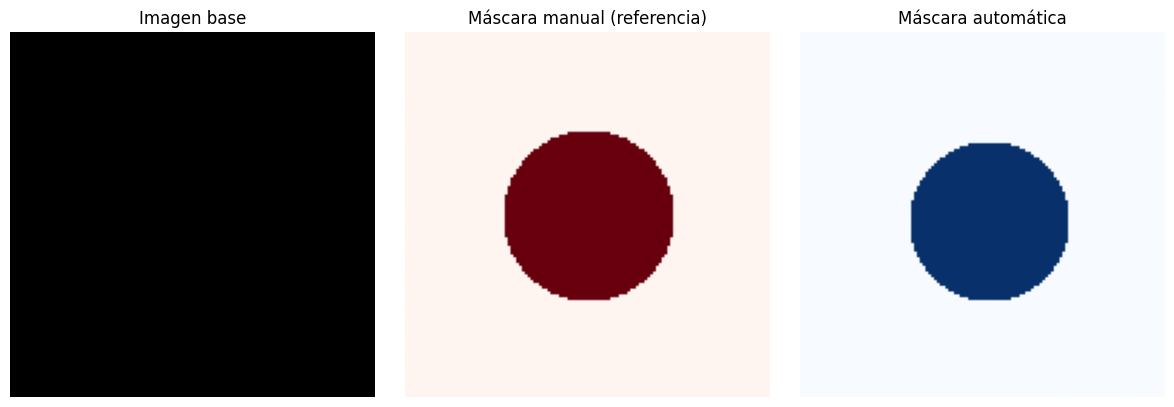

In [5]:
# Paso 3: Visualización de la imagen y las máscaras con color
plt.figure(figsize=(12, 4))

# Imagen base (gris)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen base')
plt.axis('off')

# Máscara manual (en rojo)
plt.subplot(1, 3, 2)
plt.imshow(mask_manual, cmap='Reds')
plt.title('Máscara manual (referencia)')
plt.axis('off')

# Máscara automática (en azul)
plt.subplot(1, 3, 3)
plt.imshow(mask_auto, cmap='Blues')
plt.title('Máscara automática')
plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
# Paso 4: Cálculo de métricas
def dice_coef(mask1, mask2, eps=1e-7):
    intersection = np.sum(mask1 * mask2)
    return (2 * intersection + eps) / (np.sum(mask1) + np.sum(mask2) + eps)

dice = dice_coef(mask_manual, mask_auto)
accuracy = accuracy_score(mask_manual.flatten(), mask_auto.flatten())

print(f"Coeficiente de Dice: {dice:.4f}")
print(f"Precisión voxel por voxel: {accuracy:.4f}")

Coeficiente de Dice: 0.9224
Precisión voxel por voxel: 0.9751


### 🔢 **Coeficiente de Dice: 0.9224**

Este valor indica el grado de superposición entre la máscara manual de referencia y la máscara automática generada. El **coeficiente de Dice** (o Dice Similarity Coefficient, DSC) se define como:

$$
\text{DSC} = \frac{2 \cdot |A \cap B|}{|A| + |B|}
$$

donde $A$ es la máscara manual y $B$ la máscara automática. El valor 0.9224 sugiere una **alta coincidencia** entre ambas máscaras: más del 92 % de la región segmentada por el modelo coincide con la esperada.



### 🧮 **Precisión voxel por voxel: 0.9751**

Esta métrica representa la proporción de píxeles (o "voxeles" en 3D) correctamente clasificados, es decir, cuántos píxeles del fondo y del objeto coinciden entre las dos máscaras. Un valor de **0.9751** indica que aproximadamente el **97,5 %** de los píxeles están correctamente clasificados, aunque no necesariamente implica buena segmentación si hay desbalance entre fondo y objeto.



### 🧠 Interpretación académica

Este ejemplo muestra cómo **una máscara automática puede parecer visualmente adecuada pero aún diferir ligeramente de la referencia manual**, lo cual se refleja en un coeficiente de Dice menor que 1. Estas métricas permiten cuantificar esa diferencia de forma objetiva, siendo útiles tanto para ajustar modelos como para comparar diferentes algoritmos de segmentación.


## ✅ Conclusión

Este ejercicio demuestra de manera sencilla cómo observar la estructura binaria de una máscara de segmentación, cómo una segmentación automática puede diferir de una manual y cómo las métricas como el coeficiente de Dice y la precisión voxel por voxel permiten evaluar cuantitativamente el rendimiento de un modelo de segmentación.

**Recomendación**: se sugiere extender este ejercicio utilizando imágenes reales (por ejemplo, con `SimpleITK` y archivos `.nii.gz`) o aplicar estas métricas en conjuntos de datos como BraTS o ISIC, disponibles en Kaggle.